In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\ansar_8n25yth\OneDrive\Desktop\gld_price_data.csv")

In [3]:
# print the first 5 rows from the dataset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last 5 rows from the dataset
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# describes the shape of the dataset
df.shape

(2290, 6)

In [6]:
# describes the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# describes the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df['Date'] = pd.to_numeric(df['Date'],errors = 'coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     0 non-null      float64
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(6)
memory usage: 107.5 KB


In [11]:
# finding the correlation

In [12]:
correlation = df.corr()

In [13]:
# Constructing a heatmap to understand the correlation

<Axes: >

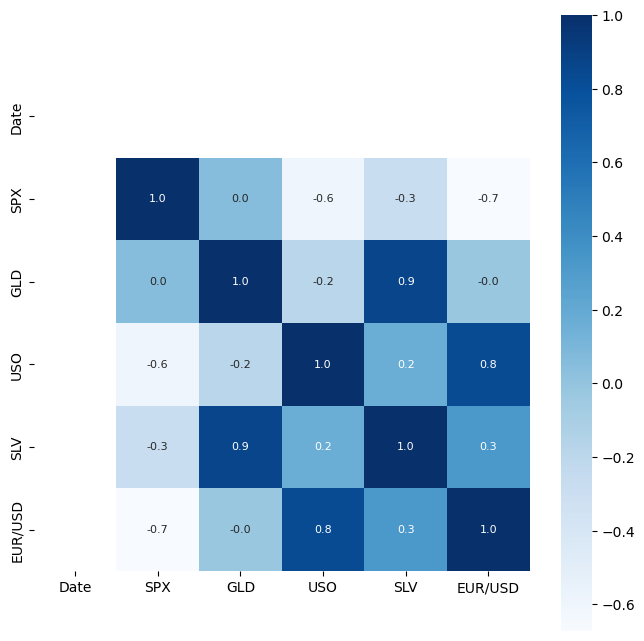

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
# 'cbar' is the color bar, 'square' is the format of the chart, 'fmt=.1f' is the no of decimal points that we want
# 'annot' are the annotations/names of the columns, 'annot_size' is the size of the annotations, 'cmap' is the color of the map

In [16]:
# correlation values of GLD

In [17]:
print(correlation['GLD'])

Date            NaN
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [18]:
# Check the distribution of the GLD price

C:\Users\ansar_8n25yth\AppData\Local\Temp\ipykernel_6828\3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

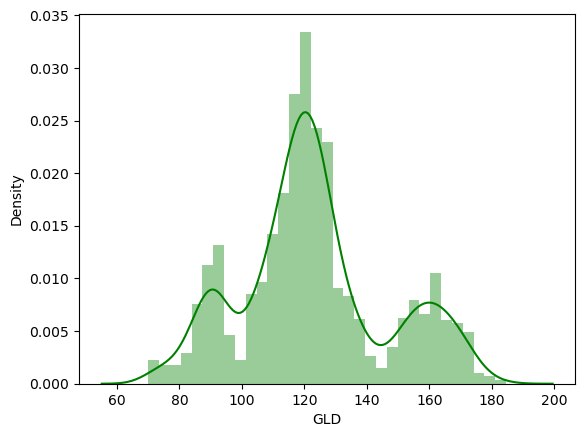

In [19]:
sns.distplot(df['GLD'],color='green')

In [20]:
# Splitting the features and target

In [21]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [22]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
# Splitting into training and testing data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
# Model training : Random Forest Regressor

In [27]:
rf = RandomForestRegressor(n_estimators=100)

In [28]:
# Training the model

In [29]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
# Model Evaluation

In [31]:
# prediction on test data
ypred =rf.predict(x_test)
print(ypred)

[168.49879948  82.10169982 115.92700077 127.52810078 120.6986012
 154.89929741 150.6511981  126.09020072 117.50099875 125.90230096
 116.53820084 171.36290098 141.46079895 168.03789913 115.26030022
 117.68180034 138.74900329 169.90780056 158.75300287 160.41609916
 154.94870036 125.05000008 175.25790035 156.99760379 125.20220039
  93.68759957  77.64830001 120.85260017 118.96659885 167.4514995
  88.24190051 125.31360042  91.11790063 117.60810029 121.10099907
 136.14120156 115.53550124 114.98330065 147.68649963 107.13380051
 104.26210256  87.10039782 126.57180069 117.91760009 154.61369889
 119.64899994 108.32799972 108.12019816  93.26690074 127.07559805
  74.73500043 113.8120994  121.12039977 111.29989883 119.00459916
 120.6867995  159.3298997  169.49190081 146.92359664  85.91779854
  94.29770034  86.88979904  90.62480032 119.02310092 126.50050066
 127.49730004 170.5548003  122.25879938 117.2202988   98.23700045
 168.61090164 143.07129873 132.02190215 121.04240273 121.97219948
 119.6893007

In [32]:
# R squared error

In [33]:
error_score = metrics.r2_score(y_test,ypred)
print("R squared error : ",error_score)

R squared error :  0.989511044049934


In [34]:
# compare the actual values and predicted values in a plot

In [35]:
y_test = list(y_test)

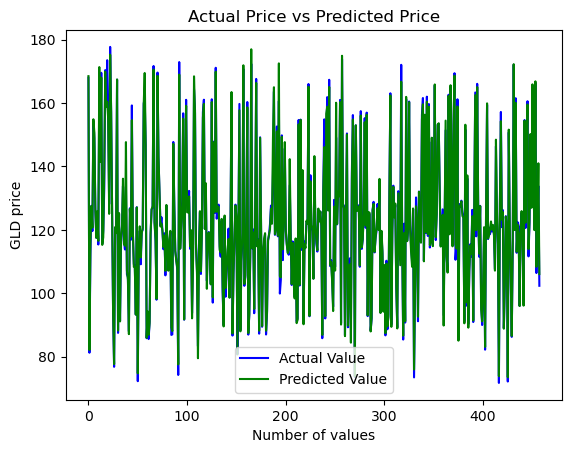

In [36]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(ypred, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()